In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [482]:
df = pd.read_csv("/Users/sandeepsrinivasdwaram/Documents/business_failures/business_failures_franceData_2014-2024.csv")

In [483]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

In [484]:
df["Year"] = pd.to_datetime(df["Year"])

In [485]:
df['CalandarYear'] = df['Year'].dt.year


In [486]:
quarter_to_month = {
    'Q1': 1,  # January
    'Q2': 4,  # April
    'Q3': 7,  # July
    'Q4': 10  # October
}
df['Year'] = df.apply(
    lambda row: row['Year'].replace(month=quarter_to_month[row['Quarter']]), axis=1
)

In [487]:
df.to_csv('business_failures_franceData_2014-2024.csv', index=False)

In [488]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

Data Understanding and Summary Stats

Summary Stats:

In [489]:
df.shape

(5016, 13)

In [490]:
df.columns

Index(['YearQuarterId', 'YearGroupId', 'Year', 'Quarter', 'FailureUnit',
       'Zone', 'ZoneCategory', 'Location', 'Capital', 'Region', 'Direction',
       'LocationCategory', 'CalandarYear'],
      dtype='object')

In [491]:
df.dtypes

YearQuarterId               object
YearGroupId                 object
Year                datetime64[ns]
Quarter                     object
FailureUnit                  int64
Zone                         int64
ZoneCategory                object
Location                    object
Capital                     object
Region                      object
Direction                   object
LocationCategory            object
CalandarYear                 int32
dtype: object

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YearQuarterId     5016 non-null   object        
 1   YearGroupId       5016 non-null   object        
 2   Year              5016 non-null   datetime64[ns]
 3   Quarter           5016 non-null   object        
 4   FailureUnit       5016 non-null   int64         
 5   Zone              5016 non-null   int64         
 6   ZoneCategory      5016 non-null   object        
 7   Location          5016 non-null   object        
 8   Capital           5016 non-null   object        
 9   Region            5016 non-null   object        
 10  Direction         5016 non-null   object        
 11  LocationCategory  5016 non-null   object        
 12  CalandarYear      5016 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(9)
memory usage: 490.0+ KB


In [493]:
df.describe()

,Year,FailureUnit,Zone,CalandarYear
count,5016,5016.000000,5016.000000,5016.0
mean,1970-05-17 00:00:00.000002018,217.615630,2.493222,1970.0
min,1970-01-01 00:00:00.000002014,0.000000,1.000000,1970.0
25%,1970-03-09 12:00:00.000002016,45.000000,1.000000,1970.0
50%,1970-05-16 12:00:00.000002020,95.000000,2.000000,1970.0
75%,1970-07-24 00:00:00.000002022,215.000000,3.000000,1970.0
max,1970-10-01 00:00:00.000002024,4219.000000,4.000000,1970.0
std,NaN,377.125954,1.122397,0.0


In [494]:
df.describe(include='all')

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
count,5016,5016,5016,5016,5016.000000,5016.000000,5016,5016,5016,5016,5016,5016,5016.0
unique,44,11,NaN,4,NaN,NaN,4,114,108,15,11,5,NaN
top,2014-Q4,G2014,NaN,Q4,NaN,NaN,Low,Ariège,Strasbourg,Occitanie,SouthEast,D,NaN
freq,114,456,NaN,1254,NaN,NaN,1282,44,88,616,836,4180,NaN
mean,NaN,NaN,1970-05-17 00:00:00.000002018,NaN,217.615630,2.493222,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
min,NaN,NaN,1970-01-01 00:00:00.000002014,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
25%,NaN,NaN,1970-03-09 12:00:00.000002016,NaN,45.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
50%,NaN,NaN,1970-05-16 12:00:00.000002020,NaN,95.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
75%,NaN,NaN,1970-07-24 00:00:00.000002022,NaN,215.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
max,NaN,NaN,1970-10-01 00:00:00.000002024,NaN,4219.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0


In [495]:
len(df['YearQuarterId'].unique())

44

In [496]:
df['YearGroupId'].value_counts()

YearGroupId
G2014    456
G2016    456
G2020    456
G2019    456
G2018    456
G2017    456
G2023    456
G2022    456
G2021    456
G2024    456
G2015    456
Name: count, dtype: int64

In [497]:
df['ZoneCategory'].value_counts()

ZoneCategory
Low         1282
High        1256
VeryHigh    1250
Medium      1228
Name: count, dtype: int64

In [498]:
df['Location'].value_counts()

Location
Ariège                 44
TerritoiredeBelfort    44
Tarn                   44
Somme                  44
Seine-Saint-Denis      44
                       ..
Cantal                 44
Calvados               44
Bouches-du-Rhône       44
Bas-Rhin               44
Overseas               44
Name: count, Length: 114, dtype: int64

In [499]:
df['Capital'].value_counts()

Capital
Strasbourg     88
Marseille      88
Nil            88
Toulouse       88
Paris          88
               ..
Caen           44
Rodez          44
Carcassonne    44
Troyes         44
Cayenne        44
Name: count, Length: 108, dtype: int64

In [500]:
df['Region'].value_counts(normalize=True,ascending=True)

Region
Bourgogne-Frenche-Comté      0.008772
Corse                        0.026316
Bretagne                     0.043860
Centre-ValdeLoire            0.052632
PaysdelaLoire                0.052632
Hauts-de-France              0.052632
Normandie                    0.052632
Nil                          0.052632
Provence-Alpes-Côted'Azur    0.061404
Bourgogne-Franche-Comté      0.078947
Île-de-France                0.078947
GrandEst                     0.096491
Auvergne-Rhône-Alpes         0.105263
Nouvelle-Aquitaine           0.114035
Occitanie                    0.122807
Name: proportion, dtype: float64

In [501]:
df['Direction'].value_counts(ascending=True)

Direction
NorthWest       220
Central         264
Nil             264
West            308
East            396
NorthCentral    396
NorthEast       484
North           528
SouthWest       572
South           748
SouthEast       836
Name: count, dtype: int64

In [502]:
df['LocationCategory'].value_counts(normalize=True)

LocationCategory
D       0.833333
R       0.114035
C       0.035088
OFOT    0.008772
O       0.008772
Name: proportion, dtype: float64

In [503]:
df['CalandarYear'].value_counts(dropna=False)

CalandarYear
1970    5016
Name: count, dtype: int64

In [504]:
df['Zone'].value_counts(bins=5)

(0.996, 1.6]    1282
(2.8, 3.4]      1256
(3.4, 4.0]      1250
(1.6, 2.2]      1228
(2.2, 2.8]         0
Name: count, dtype: int64

In [505]:
df['FailureUnit'].value_counts(bins=10)

(-4.220000000000001, 421.9]    4380
(421.9, 843.8]                  358
(843.8, 1265.7]                 138
(1265.7, 1687.6]                 77
(1687.6, 2109.5]                 26
(2953.3, 3375.2]                 15
(2109.5, 2531.4]                 11
(3375.2, 3797.1]                  5
(2531.4, 2953.3]                  4
(3797.1, 4219.0]                  2
Name: count, dtype: int64

In [506]:
df.isnull().sum()

YearQuarterId       0
YearGroupId         0
Year                0
Quarter             0
FailureUnit         0
Zone                0
ZoneCategory        0
Location            0
Capital             0
Region              0
Direction           0
LocationCategory    0
CalandarYear        0
dtype: int64

<Axes: >

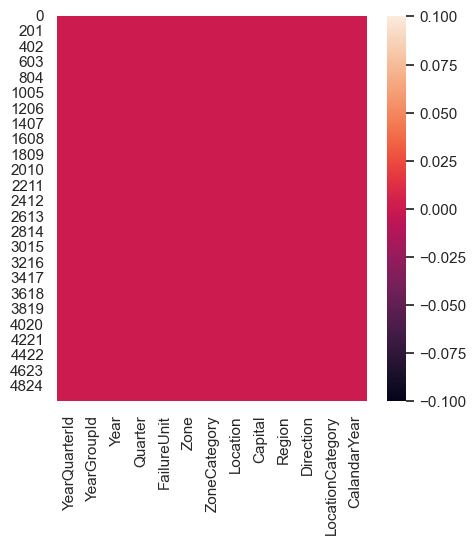

In [507]:
sns.heatmap(df.isnull())

Exploratory Analysis

Univariate Analysis (Categorical and Numeric)

In [508]:
df.describe(include='all')

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
count,5016,5016,5016,5016,5016.000000,5016.000000,5016,5016,5016,5016,5016,5016,5016.0
unique,44,11,NaN,4,NaN,NaN,4,114,108,15,11,5,NaN
top,2014-Q4,G2014,NaN,Q4,NaN,NaN,Low,Ariège,Strasbourg,Occitanie,SouthEast,D,NaN
freq,114,456,NaN,1254,NaN,NaN,1282,44,88,616,836,4180,NaN
mean,NaN,NaN,1970-05-17 00:00:00.000002018,NaN,217.615630,2.493222,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
min,NaN,NaN,1970-01-01 00:00:00.000002014,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
25%,NaN,NaN,1970-03-09 12:00:00.000002016,NaN,45.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
50%,NaN,NaN,1970-05-16 12:00:00.000002020,NaN,95.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
75%,NaN,NaN,1970-07-24 00:00:00.000002022,NaN,215.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0
max,NaN,NaN,1970-10-01 00:00:00.000002024,NaN,4219.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1970.0


In [509]:
df.head(10)

,YearQuarterId,YearGroupId,Year,Quarter,FailureUnit,Zone,ZoneCategory,Location,Capital,Region,Direction,LocationCategory,CalandarYear
0,2014-Q4,G2014,1970-10-01 00:00:00.000002014,Q4,21,1,Low,Ariège,Foix,Occitanie,South,D,1970
1,2016-Q3,G2016,1970-07-01 00:00:00.000002016,Q3,30,1,Low,Ariège,Foix,Occitanie,South,D,1970
2,2014-Q1,G2014,1970-01-01 00:00:00.000002014,Q1,31,1,Low,Ariège,Foix,Occitanie,South,D,1970
3,2020-Q3,G2020,1970-07-01 00:00:00.000002020,Q3,13,1,Low,Ariège,Foix,Occitanie,South,D,1970
4,2019-Q4,G2019,1970-10-01 00:00:00.000002019,Q4,21,1,Low,Ariège,Foix,Occitanie,South,D,1970
5,2014-Q2,G2014,1970-04-01 00:00:00.000002014,Q2,31,1,Low,Ariège,Foix,Occitanie,South,D,1970
6,2020-Q4,G2020,1970-10-01 00:00:00.000002020,Q4,17,1,Low,Ariège,Foix,Occitanie,South,D,1970
7,2020-Q1,G2020,1970-01-01 00:00:00.000002020,Q1,28,1,Low,Ariège,Foix,Occitanie,South,D,1970
8,2018-Q3,G2018,1970-07-01 00:00:00.000002018,Q3,23,1,Low,Ariège,Foix,Occitanie,South,D,1970
9,2017-Q2,G2017,1970-04-01 00:00:00.000002017,Q2,20,1,Low,Ariège,Foix,Occitanie,South,D,1970


In [510]:
direction_counts = df['Direction'].value_counts()

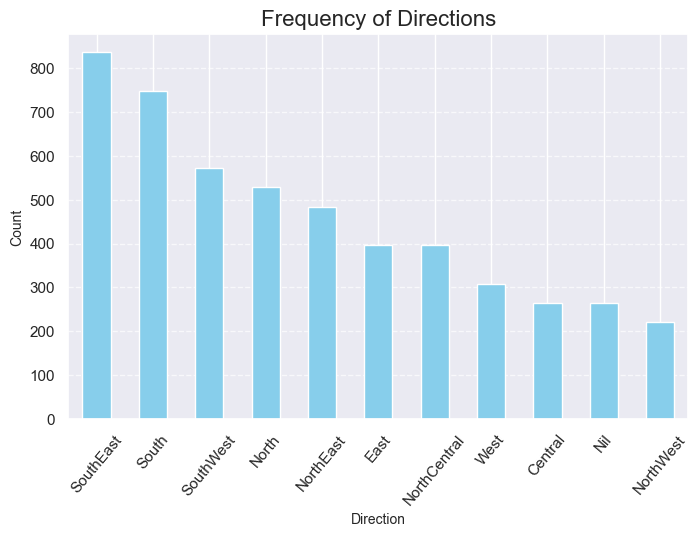

In [511]:
direction_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Frequency of Directions', fontsize=16)
plt.xlabel('Direction', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [512]:
locationcategory_counts = df['LocationCategory'].value_counts()

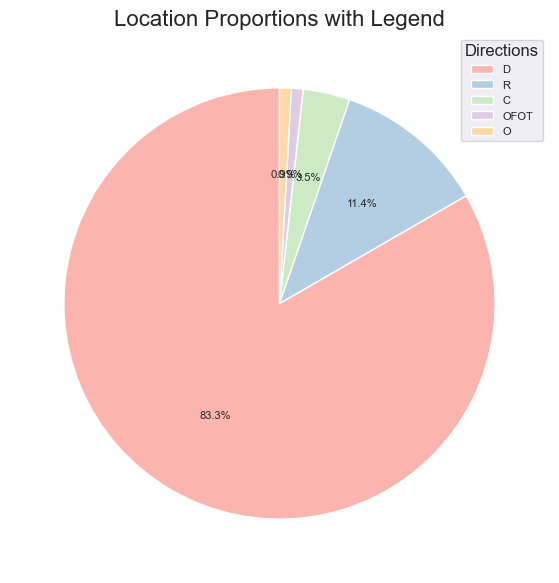

In [513]:
fig, ax = plt.subplots(figsize=(8,7))
wedges, texts, autotexts = ax.pie(
    locationcategory_counts, 
    labels=None,  # Suppress labels on the pie itself
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors, 
    textprops={'fontsize': 8}
)
ax.legend(
    locationcategory_counts.index,  # Use the categories as labels
    title="Directions",  # Legend title
    loc="best",  # Position the legend automatically
    fontsize=8
)
# explode = [0.1] * len(locationcategory_counts)  # Explode all segments slightly
# ax.pie(locationcategory_counts, explode=explode,startangle=90)


plt.title('Location Proportions with Legend', fontsize=16)
plt.show()

<Figure size 500x500 with 0 Axes>

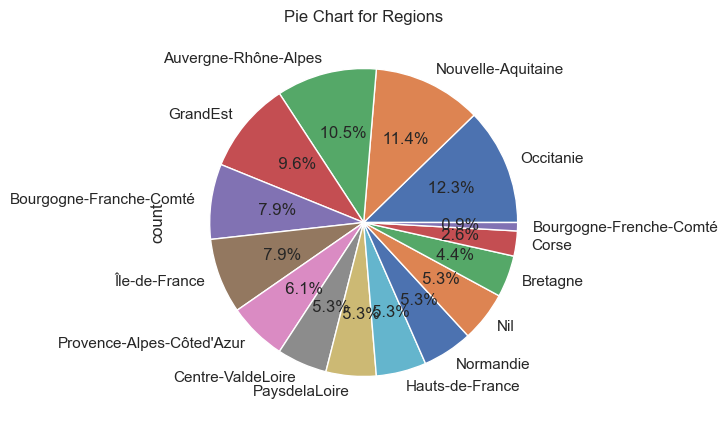

<Figure size 500x500 with 0 Axes>

In [514]:
plt.title('Pie Chart for Regions')
df['Region'].value_counts().plot(kind = "pie", autopct = "%5.1f%%")
plt.figure(figsize=(5,5))


Text(0, 0.5, 'Count')

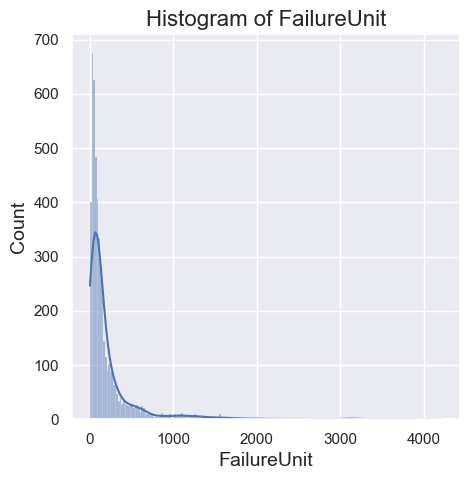

In [520]:
sns.histplot(df['FailureUnit'], kde=True)
plt.title('Histogram of FailureUnit', fontsize=16)
plt.xlabel('FailureUnit', fontsize=14)
plt.ylabel('Count', fontsize=14)

<Axes: xlabel='FailureUnit', ylabel='Density'>

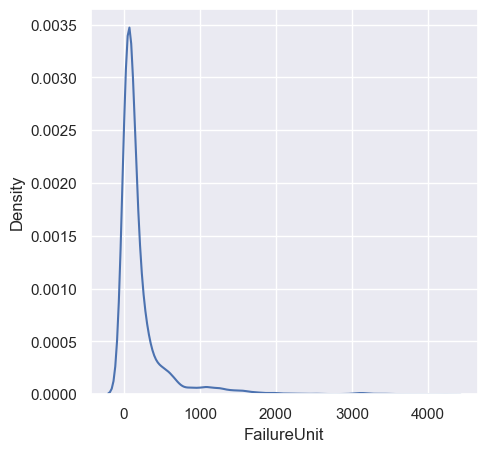

In [522]:
sns.kdeplot(df['FailureUnit'])

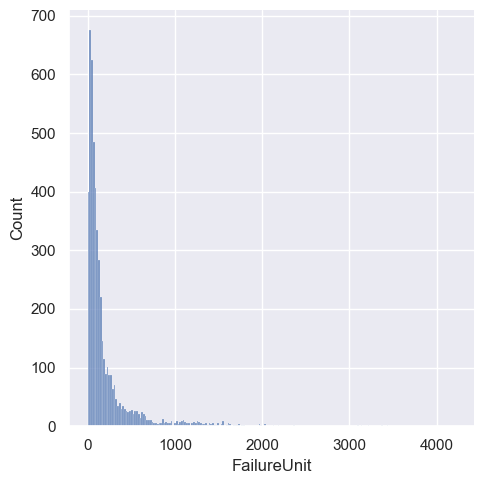

In [519]:
sns.displot(df['FailureUnit'])